In [1]:
%reset -f

import pandas as pd
import numpy as np
import datetime
import math
from scipy import stats

# Define resumetable funciton

In [2]:
#Define resumetable funciton
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

## Import data

In [3]:
data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
'age': [20, 19, 22, 21],
'favorite_color': ['blue', 'red', 'yellow', "green"],
'grade': [88, 92, 95, 70],
'birth_date': ['01-02-1996', '08-05-1997', '04-28-1996', '12-16-1995']}
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
data = pd.DataFrame(data)
data['month'] = pd.DatetimeIndex(data['birth_date']).month

In [4]:
#let's take a look!
resumetable(data)

Dataset Shape: (4, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,name,object,0,4,Willard Morris,Al Jennings,Omar Mullins,2.0
1,age,int64,0,4,20,19,22,2.0
2,favorite_color,object,0,4,blue,red,yellow,2.0
3,grade,int64,0,4,88,92,95,2.0
4,birth_date,object,0,4,01-02-1996,08-05-1997,04-28-1996,2.0
5,month,int64,0,4,1,8,4,2.0


## Cycle features

In [7]:
#cycle feature
data['month_Angle'] = (data['month']-1)/12
data['month_ArcLen'] = (2*math.pi/12)*(data['month']-1)#依弧長計算

#sin, tan transform: 角度越大,誤差越大 
data['month_ArcLen_sin'] = np.sin((2*math.pi/12)*(data['month']-1))#依sin(弧長)計算
data['month_ArcLen_tan'] = np.tan((2*math.pi/12)*(data['month']-1))#依tan(弧長)計算
data

,name,age,favorite_color,grade,birth_date,month,month_Angle,month_ArcLen,month_ArcLen_sin,month_ArcLen_tan
0,Willard Morris,20,blue,88,01-02-1996,1,0.000000,0.000000,0.0,0.000000e+00
1,Al Jennings,19,red,92,08-05-1997,8,0.583333,3.665191,-0.5,5.773503e-01
2,Omar Mullins,22,yellow,95,04-28-1996,4,0.250000,1.570796,1.0,1.633124e+16
3,Spencer McDaniel,21,green,70,12-16-1995,12,0.916667,5.759587,-0.5,-5.773503e-01


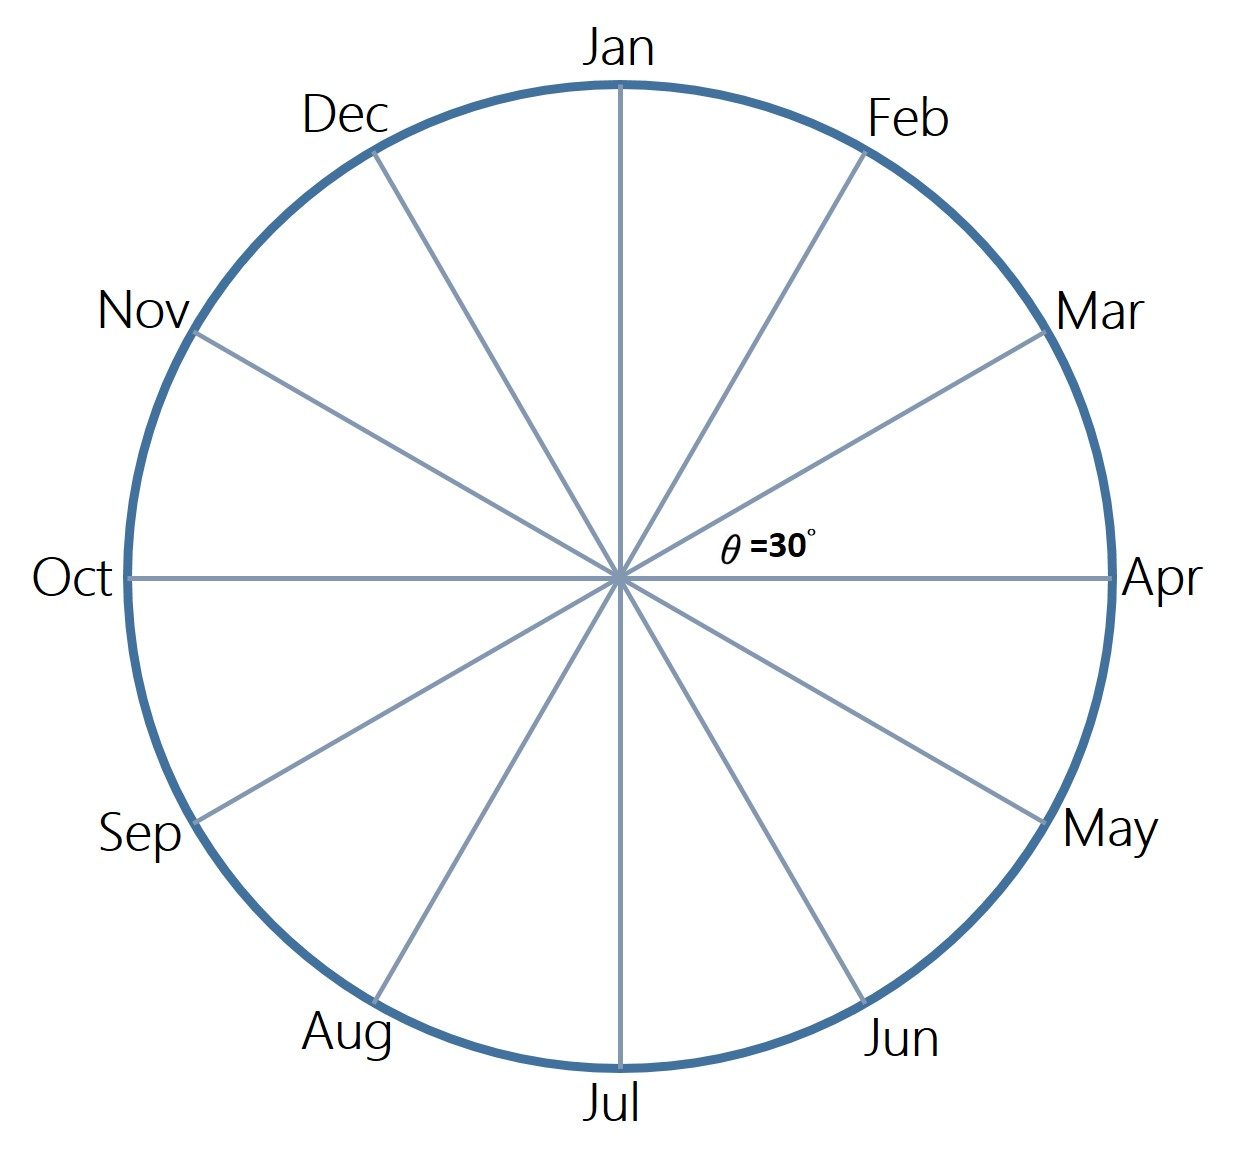

In [10]:
from IPython.display import Image
Image("Cycle.jpg")